In [315]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import normalize

def loadFiles(path):
    furhat_files = []
    
    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            src = filename
            furhat_files.append(src)
            
    return furhat_files

def returnFileGroup(lookup,furhat_pos_name):
    row = lookup[lookup['furhat_pose']==furhat_pos_name]
    fur = pd.read_csv('video_log_labels/furhat_csvs/'+row['furhat_pose'].tolist()[0])
    part = pd.read_csv('video_log_labels/participant_video_csvs/'+row['participant_pose'].tolist()[0])
    spee = pd.read_csv('video_log_labels/speech_csvs/'+row['speech'].tolist()[0])
    fs = pd.read_csv('video_log_labels/furhat_speech_csvs/'+row['furhat_speech'].tolist()[0])
    print('video_log_labels/participant_video_csvs/'+row['participant_pose'].tolist()[0])
    return fur, fs, part, spee

def matchTime(furhatpose, furhatspeech, particip, transc):
    try:
        time_video = float(transc[transc['DisplayText'].str.contains('Vad heter du och')]['Offset'].tolist()[0])
        time_log = float(furhatspeech[furhatspeech['value'].str.contains('text: Vad heter du')]['timestamp'].tolist()[0])
    except:
        try:
            time_video = float(transc[transc['DisplayText'].str.contains('Trevligt att')]['Offset'].tolist()[0])
            time_log = float(furhatspeech[furhatspeech['value'].str.contains('text: Trevligt att')]['timestamp'].tolist()[0])
        except:
            try:
                time_video = float(transc[transc['DisplayText'].str.contains('vad heter du?')]['Offset'].tolist()[0])
                time_log = float(furhatspeech[furhatspeech['value'].str.contains('text: Vad heter du')]['timestamp'].tolist()[0])
            except:
                time_video = float(transc[transc['DisplayText'].str.contains('Vad gör du och')]['Offset'].tolist()[0])
                time_log = float(furhatspeech[furhatspeech['value'].str.contains('text: Vad heter du')]['timestamp'].tolist()[0])
    print('video matched at '+str(time_video)+' to log at '+str(time_log))
    #hard coded with 5455
    #time_log = -1.013525
    #video_log = 28.147
    furhatspeech['timestamp'] = furhatspeech['timestamp'].astype(float)-time_log
    furhatpose['timestamp'] = furhatpose['timestamp']-time_log
    particip['time_elapsed (s)'] = particip['time_elapsed (s)']-time_video
    #print(particip)
    #particip.columns = 
    transc['Offset'] = transc['Offset'].astype(float)-time_video
    return furhatpose, furhatspeech, particip, transc

In [339]:
file_idx = 6 #choose index between 1 and 26 (not 7 because there is no 38 video) #18 #8 #10 #24 
speech = loadFiles('video_log_labels/speech_csvs/')
furhat = loadFiles('video_log_labels/furhat_csvs/')
furhat_speech = loadFiles('video_log_labels/furhat_speech_csvs/')
lookup = pd.DataFrame(pd.read_excel('video_log_labels/log_lookup.xlsx'))
print('analyzing ',furhat[file_idx])
print(furhat)
furhat_pose, furhat_speech, participant, transcribe = returnFileGroup(lookup,furhat[file_idx])
#print(participant)
#print(transcribe[['Offset','DisplayText']])
#print(participant[['time_elapsed (s)','left angle horizontal']])
print(transcribe)
fp_adj, fs_adj, p_adj, t_adj = matchTime(pd.DataFrame(furhat_pose), pd.DataFrame(furhat_speech).astype(str), pd.DataFrame(participant), pd.DataFrame(transcribe).astype(str))

analyzing  Oct-02-2020_16-47-18_mediation_108_Furhat.csv
['Oct-01-2020_15-04-33_control_096_Furhat.csv', 'Oct-01-2020_15-59-36_mediation_098_Furhat.csv', 'Oct-01-2020_17-28-47_control_100_Furhat.csv', 'Oct-02-2020_13-04-29_control_102_Furhat.csv', 'Oct-02-2020_13-54-16_mediation_104_Furhat.csv', 'Oct-02-2020_16-12-07_control_106_Furhat.csv', 'Oct-02-2020_16-47-18_mediation_108_Furhat.csv', 'Sep-18-2020_16-01-46_mediation_038_Furhat.csv', 'Sep-21-2020_15-13-05_control_040_Furhat.csv', 'Sep-21-2020_16-49-13_mediation_044_Furhat.csv', 'Sep-23-2020_12-53-50_control_046_Furhat.csv', 'Sep-23-2020_13-52-17_mediation_048_Furhat.csv', 'Sep-23-2020_14-37-52_control_050_Furhat.csv', 'Sep-23-2020_15-57-49_control_054_Furhat.csv', 'Sep-23-2020_17-26-08_mediation_056_Furhat.csv', 'Sep-24-2020_15-59-45_mediation_060_Furhat.csv', 'Sep-24-2020_16-45-19_control_062_Furhat.csv', 'Sep-24-2020_17-32-23_mediation_064_Furhat.csv', 'Sep-25-2020_13-44-26_mediation_066_Furhat.csv', 'Sep-25-2020_16-05-55_control

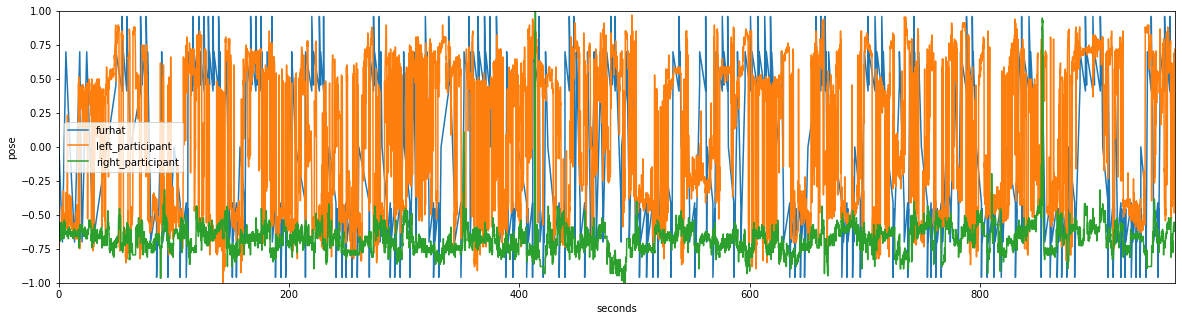

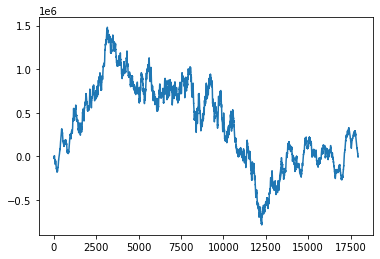

In [317]:
furhat_pose = np.array(fp_adj)
participant_pose = np.array(p_adj)
plt.figure(0,figsize=(20,5))
plt.plot(furhat_pose[:,1],furhat_pose[:,2],label = 'furhat')
plt.plot(participant_pose[:,1], 2*(participant_pose[:,3] - min(participant_pose[:,3])) / (max(participant_pose[:,3]) - min(participant_pose[:,3]))-1,label = 'left_participant')
plt.plot(participant_pose[:,1], 2*(participant_pose[:,5] - min(participant_pose[:,5])) / (max(participant_pose[:,5]) - min(participant_pose[:,5]))-1,label = 'right_participant')
plt.xlim(0,np.max(furhat_pose[:,1]))
plt.ylim(-1,1)
plt.xlabel('seconds')
plt.ylabel('pose')
plt.legend()

from scipy.signal import correlate
corr = correlate(participant_pose[:,3],participant_pose[:,5])
plt.figure(1)
plt.plot(corr)

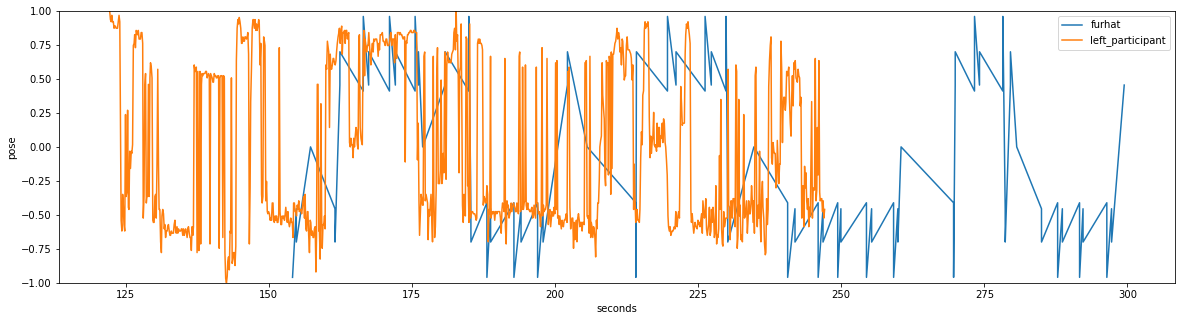

In [322]:
furhat_pose = np.array(fp_adj)
participant_pose = np.array(p_adj)
plt.figure(0,figsize=(20,5))
plt.plot(furhat_pose[90:200,1],furhat_pose[90:200,2],label = 'furhat')
plt.plot(participant_pose[2000:3000,1], 2*(participant_pose[2000:3000,3] - min(participant_pose[2000:3000,3])) / (max(participant_pose[2000:3000,3]) - min(participant_pose[2000:3000,3]))-1,label = 'left_participant')
#plt.plot(participant_pose[2000:3000,1], 2*(participant_pose[2000:3000,5] - min(participant_pose[2000:3000,5])) / (max(participant_pose[2000:3000,5]) - min(participant_pose[2000:3000,5]))-1,label = 'right_participant')
#plt.xlim(0,np.max(furhat_pose[:,1]))
plt.ylim(-1,1)
plt.xlabel('seconds')
plt.ylabel('pose')
plt.legend()

Text(0.5, 1.0, 'Left Participant')

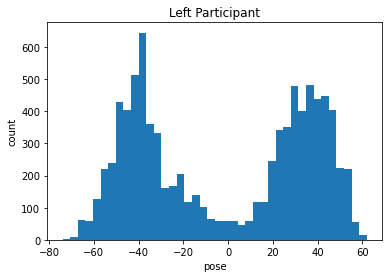

In [323]:
plt.hist(participant_pose[:,3],bins = 40)
plt.xlabel('pose')
plt.ylabel('count')
plt.title('Left Participant')

Text(0.5, 1.0, 'Right Participant')

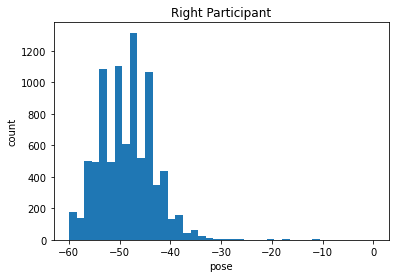

In [324]:
plt.hist(participant_pose[:,5],bins = 40,range=(-60,0))
plt.xlabel('pose')
plt.ylabel('count')
plt.title('Right Participant')

In [325]:
data = pd.read_csv('video_log_labels/5455_gazetargets.txt', sep='\t', header = None)
data.columns = ['gaze_subject', 'ignore', 'ignore1', 'begin_time', 'ignore2', 'ignore3','end_time', 'ignore4', 'ignore5', 'duration', 'ignore6','gaze_object','horizontal_angle']
data = data.drop(['ignore', 'ignore1','ignore2', 'ignore3','ignore4', 'ignore5','ignore6'],1)
print(data)

   gaze_subject  begin_time  end_time  duration gaze_object horizontal_angle
0    GazeOfLeft      26.411    26.745     0.334       Robot        (-51,-45)
1    GazeOfLeft      27.470    28.431     0.961       Other        (-49,-57)
2    GazeOfLeft      38.685    41.666     2.981       Robot        (-51,-56)
3    GazeOfLeft     158.978   160.077     1.099      Tablet        (-53,-56)
4    GazeOfLeft     709.970   710.892     0.922       Other        (-47,-55)
5    GazeOfLeft     714.402   716.519     2.117      Tablet        (-50,-54)
6    GazeOfLeft     718.940   719.882     0.942       Other        (-55,-56)
7   GazeOfRight      26.411    26.745     0.334       Robot          (31,36)
8   GazeOfRight      26.745    27.823     1.078       Other          (41,48)
9   GazeOfRight      38.685    41.666     2.981       Robot         (-32,35)
10  GazeOfRight     158.978   160.077     1.099      Tablet          (42,44)
11  GazeOfRight     337.921   338.764     0.843       Other          (44,49)

In [326]:
from tqdm import tqdm
furhat_right = []
for i in range(1,len(fp_adj.index)):
    if (fp_adj.iloc[i]['side']=='right') & (fp_adj.iloc[i-1]['side']!='right'):
        furhat_right.append(fp_adj.iloc[i])
#print(pd.DataFrame(furhat_right))
df_right = fp_adj[(fp_adj['side']=='right')]
df_left = fp_adj[(fp_adj['side']=='left')]
df_right = pd.DataFrame(furhat_right)
new_matrix = []
for i,j in tqdm(df_right.iterrows()): 
    for k,l in p_adj.iterrows():
        if (l['time_elapsed (s)'] <= j['timestamp'] + 2.0) & (l['time_elapsed (s)'] >= j['timestamp']):
            new_matrix.append([i,l['time_elapsed (s)'],l['left angle vertical'],l['left angle horizontal'],l['right angle vertical'],l['right angle horizontal']])
            #print([i,l['time_elapsed (s)'],l['left angle vertical'],l['left angle horizontal'],l['right angle vertical'],l['right angle horizontal']])
#print(new_matrix)

56it [00:35,  1.56it/s]


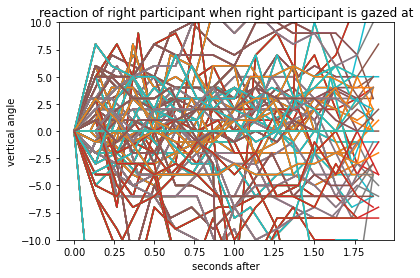

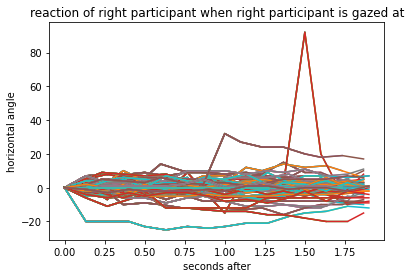

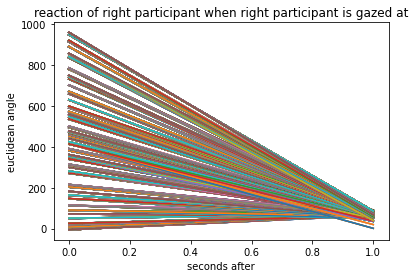

In [327]:
#plot
idx = 0
plot_data = []
diff = []
difference=0
avg_hdiffs = []
avg_vdiffs = []
avg_ediffs = []
avgh=0
avgv=0
avge=0
firsth=0
firstv=0
firste=0
#change range to change number of lines on plot if too crowded
for idx in range(800):
    yh=[]
    yv=[]
    ye=[]
    count = 0
    for i in range(len(new_matrix)):
        if new_matrix[i][0] == idx:
            #index 3 = right horizontal, index 5 = left horizontal
            #y.append([new_matrix[i][1],new_matrix[i][3]])
            if count == 0:
                avg_hdiffs.append(avgh-firsth)
                avg_vdiffs.append(avgv-firstv)
                avg_ediffs.append(avge)
                avge = np.zeros(2)
                valh = new_matrix[i][5]
                firsth = valh.copy()
                valv = new_matrix[i][4]
                firstv = valv.copy()
                vale = np.array(new_matrix[i][5],new_matrix[i][4])
                firste = vale.copy()
            else:
                valh += new_matrix[i][5]
                valv += new_matrix[i][4]
                vale = np.array(new_matrix[i][5],new_matrix[i][4])
            yh.append([new_matrix[i][1],new_matrix[i][5]])
            yv.append([new_matrix[i][1],new_matrix[i][4]])
            ye.append([new_matrix[i][1],np.linalg.norm(vale-np.zeros(2))])
            avgh = valh/len(yh)
            avgv = valv/len(yv)
            avge = np.linalg.norm(vale-avge)
            #print(avge)
            #print(np.array(y)[-1,1]-np.array(y)[0,1])
            plt.figure(1)
            plt.plot((np.array(yh)[:,0]-np.array(yh)[0,0]),np.array(yh)[:,1]-np.array(yh)[0,1])
            plt.xlabel('seconds after')
            plt.ylabel('vertical angle')
            plt.title('reaction of right participant when right participant is gazed at')
            plt.ylim(-10,10)
            plt.figure(2)
            plt.plot((np.array(yv)[:,0]-np.array(yv)[0,0]),np.array(yv)[:,1]-np.array(yv)[0,1])
            plt.xlabel('seconds after')
            plt.ylabel('horizontal angle')
            plt.title('reaction of right participant when right participant is gazed at')
            plt.figure(3)
            plt.plot((np.array(ye)[:,0],np.array(ye)[:,1]))
            plt.xlabel('seconds after')
            plt.ylabel('euclidean angle')
            plt.title('reaction of right participant when right participant is gazed at')
            count+=1


Text(0, 0.5, 'eucliedan moving avg')

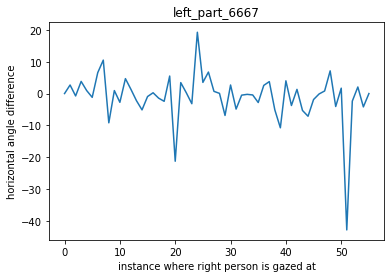

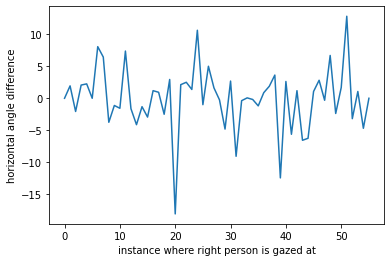

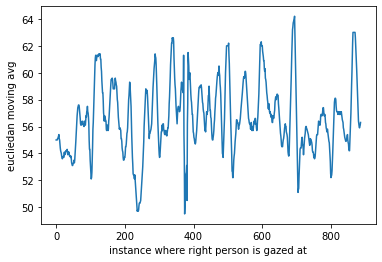

In [328]:
plt.figure(2)
plt.plot(avg_hdiffs)
plt.xlabel('instance where right person is gazed at')
plt.ylabel('horizontal angle difference')
plt.title('left_part_6667')
plt.figure(3)
plt.plot(avg_vdiffs)
plt.xlabel('instance where right person is gazed at')
plt.ylabel('horizontal angle difference')
plt.figure(4)
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
leftAngleDiff = np.array([np.linalg.norm(a-b) for a,b in zip(np.array(new_matrix[:], 'float')[:,5], np.array(new_matrix[:], 'float')[:,4])], 'float')
#print(leftAngleDiff)
#leftAngleDiff = np.array([new_matrix[:][1],new_matrix[:][5],new_matrix[:][4]])
mov_average = moving_average(leftAngleDiff, 10)
plt.plot(np.arange(mov_average.shape[0]), mov_average)
plt.xlabel('instance where right person is gazed at')
plt.ylabel('eucliedan moving avg')

TypeError: list indices must be integers or slices, not tuple

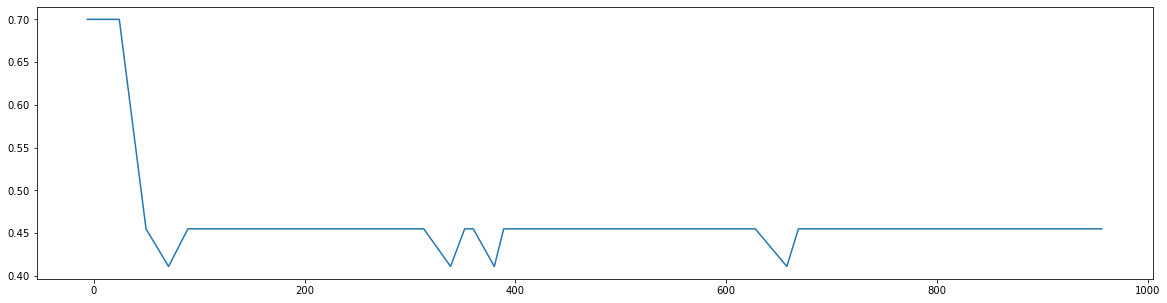

In [329]:
furhat_pose = np.array(df_right)
participant_pose = np.array(p_adj)
plt.figure(figsize=(20,5))
plt.plot(furhat_pose[:,1],furhat_pose[:,2],label = 'furhat')
plt.plot(new_matrix[:,1], 2*(new_matrix[:,3] - min(new_matrix[:,3])) / (max(new_matrix[:,3]) - min(new_matrix[:,3]))-1,label = 'left_participant')
plt.plot(new_matrix[:,1], 2*(new_matrix[:,5] - min(new_matrix[:,5])) / (max(new_matrix[:,5]) - min(new_matrix[:,5]))-1,label = 'right_participant')
plt.xlim(0,np.max(furhat_pose[:,1]))
plt.ylim(-1,1)
plt.xlabel('seconds')
plt.ylabel('pose')
plt.legend()

In [333]:
data = pd.read_csv('video_log_labels/92_annotations.txt', sep='\t', header = None)
data.columns = ['gaze_subject', 'ignore','ignore2', 'begin_time','ignore4','end_time', 'ignore6', 'duration','gaze_object']
data = data.drop(['ignore','ignore2', 'ignore4','ignore6'],1)
print(data)

    gaze_subject  begin_time  end_time  duration gaze_object
0     GazeOfLeft     110.565   114.895     4.330       Robot
1     GazeOfLeft     114.905   115.665     0.760       Other
2     GazeOfLeft     115.680   120.260     4.580       Robot
3     GazeOfLeft     120.265   120.875     0.610       Other
4     GazeOfLeft     120.875   124.305     3.430       Robot
5     GazeOfLeft     124.305   124.835     0.530       Other
6     GazeOfLeft     124.835   136.410    11.575       Robot
7     GazeOfLeft     136.410   137.030     0.620       Robot
8     GazeOfLeft     137.045   138.115     1.070      Tablet
9     GazeOfLeft     138.125   144.945     6.820       Robot
10    GazeOfLeft     144.945   145.680     0.735       Other
11    GazeOfLeft     145.680   151.215     5.535       Robot
12    GazeOfLeft     151.215   152.050     0.835      Tablet
13    GazeOfLeft     152.050   158.800     6.750       Robot
14    GazeOfLeft     158.810   159.810     1.000      Tablet
15    GazeOfLeft     159

In [334]:
left = data[data['gaze_subject']=='GazeOfLeft']
left['encoded'] = np.where(left['gaze_object'] == 'Robot', 0, np.where(left['gaze_object'] == 'Tablet', 1, 2))
left_robot_dur = left[left['gaze_object']=='Robot']['duration'].sum()
print(left_robot_dur)
left_other_dur = left[left['gaze_object']=='Other']['duration'].sum()
print(left_other_dur)
left_tablet_dur = left[left['gaze_object']=='Tablet']['duration'].sum()
print(left_tablet_dur)

    gaze_subject  begin_time  end_time  duration gaze_object
0     GazeOfLeft     110.565   114.895     4.330       Robot
1     GazeOfLeft     114.905   115.665     0.760       Other
2     GazeOfLeft     115.680   120.260     4.580       Robot
3     GazeOfLeft     120.265   120.875     0.610       Other
4     GazeOfLeft     120.875   124.305     3.430       Robot
5     GazeOfLeft     124.305   124.835     0.530       Other
6     GazeOfLeft     124.835   136.410    11.575       Robot
7     GazeOfLeft     136.410   137.030     0.620       Robot
8     GazeOfLeft     137.045   138.115     1.070      Tablet
9     GazeOfLeft     138.125   144.945     6.820       Robot
10    GazeOfLeft     144.945   145.680     0.735       Other
11    GazeOfLeft     145.680   151.215     5.535       Robot
12    GazeOfLeft     151.215   152.050     0.835      Tablet
13    GazeOfLeft     152.050   158.800     6.750       Robot
14    GazeOfLeft     158.810   159.810     1.000      Tablet
15    GazeOfLeft     159

C:\Users\Catherine\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
right = data[data['gaze_subject']=='GazeOfRight']
right_robot_dur = right[right['gaze_object']=='Robot']['duration'].sum()
print(right_robot_dur)
right_other_dur = right[right['gaze_object']=='Other']['duration'].sum()
print(right_other_dur)
right_tablet_dur = right[right['gaze_object']=='Tablet']['duration'].sum()
print(right_tablet_dur)